In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('Train_NY_cleaned.csv')
test = pd.read_csv('Test_NY_cleaned.csv')

In [4]:
train.head(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,0,1,ALPHABET CITY,RENTALS - WALKUP APARTMENTS,392,6,10009,5,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,3,1,ALPHABET CITY,RENTALS - WALKUP APARTMENTS,402,21,10009,10,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
2,4,1,ALPHABET CITY,RENTALS - WALKUP APARTMENTS,404,55,10009,6,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [5]:
test.head(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,1,ALPHABET CITY,RENTALS - WALKUP APARTMENTS,399,26,10009,28,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
1,2,1,ALPHABET CITY,RENTALS - WALKUP APARTMENTS,399,39,10009,16,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
2,5,1,ALPHABET CITY,RENTALS - WALKUP APARTMENTS,405,16,10009,20,20,2581.0,9730.0,1900,2,C4,NaN,2017-07-20


In [6]:
a = train.columns
b = test.columns

In [7]:
a.intersection(b)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [8]:
train['data']='train'
test['data']='test'
test=test[train.columns]
all_d = pd.concat([train,test],axis=0)

In [9]:
all_d.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,data
0,0,1,ALPHABET CITY,RENTALS - WALKUP APARTMENTS,392,6,10009,5,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,train
1,3,1,ALPHABET CITY,RENTALS - WALKUP APARTMENTS,402,21,10009,10,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,train
2,4,1,ALPHABET CITY,RENTALS - WALKUP APARTMENTS,404,55,10009,6,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,train
3,6,1,ALPHABET CITY,RENTALS - WALKUP APARTMENTS,406,32,10009,8,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,train
4,9,1,ALPHABET CITY,RENTALS - ELEVATOR APARTMENTS,387,153,10009,24,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,train


In [10]:
all_d.dtypes

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
BLOCK                               int64
LOT                                 int64
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
TOTAL UNITS                         int64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                          object
data                               object
dtype: object

In [11]:
all_d.drop(['Unnamed: 0','BUILDING CLASS CATEGORY'],axis=1,inplace=True)

In [12]:
all_d['SALE DATE'] = pd.to_datetime(all_d['SALE DATE'], errors='coerce')

In [13]:
all_d['YEAR SOLD'] = all_d['SALE DATE'].apply(lambda x: x.year)
all_d['MONTH SOLD'] = all_d['SALE DATE'].apply(lambda x: x.month)
all_d['DAY SOLD'] = all_d['SALE DATE'].apply(lambda x: x.day)


all_d = all_d.drop('SALE DATE', axis=1)

In [14]:
all_d['BOROUGH'] = all_d['BOROUGH'].astype(str)

all_d['BOROUGH'] = all_d['BOROUGH'].str.replace("1", "Manhattan")
all_d['BOROUGH'] = all_d['BOROUGH'].str.replace("2", "Bronx")
all_d['BOROUGH'] = all_d['BOROUGH'].str.replace("3", "Brooklyn")
all_d['BOROUGH'] = all_d['BOROUGH'].str.replace("4", "Queens")
all_d['BOROUGH'] = all_d['BOROUGH'].str.replace("5", "Staten Island")

In [15]:
all_d['NEIGHBORHOOD'] = all_d['NEIGHBORHOOD'].replace(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
       'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
       'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
       'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
       'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN CBD',
       'MIDTOWN EAST', 'MIDTOWN WEST', 'MORNINGSIDE HEIGHTS',
       'MURRAY HILL', 'ROOSEVELT ISLAND', 'SOHO', 'SOUTHBRIDGE',
       'TRIBECA', 'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
       'UPPER EAST SIDE (96-110)', 'UPPER WEST SIDE (59-79)',
       'UPPER WEST SIDE (79-96)', 'UPPER WEST SIDE (96-116)',
       'WASHINGTON HEIGHTS LOWER', 'WASHINGTON HEIGHTS UPPER'],
                                                      'Manhattan_Neighborhood')

In [16]:
all_d['NEIGHBORHOOD'] = all_d['NEIGHBORHOOD'].replace(['BATHGATE', 'BAYCHESTER', 'BEDFORD PARK/NORWOOD', 'BELMONT',
       'BRONX PARK', 'BRONXDALE', 'CASTLE HILL/UNIONPORT', 'CITY ISLAND',
       'CITY ISLAND-PELHAM STRIP', 'CO-OP CITY', 'COUNTRY CLUB',
       'CROTONA PARK', 'EAST RIVER', 'EAST TREMONT', 'FIELDSTON',
       'FORDHAM', 'HIGHBRIDGE/MORRIS HEIGHTS', 'HUNTS POINT',
       'KINGSBRIDGE HTS/UNIV HTS', 'KINGSBRIDGE/JEROME PARK',
       'MELROSE/CONCOURSE', 'MORRIS PARK/VAN NEST', 'MORRISANIA/LONGWOOD',
       'MOTT HAVEN/PORT MORRIS', 'MOUNT HOPE/MOUNT EDEN', 'PARKCHESTER',
       'PELHAM BAY', 'PELHAM GARDENS', 'PELHAM PARKWAY NORTH',
       'PELHAM PARKWAY SOUTH', 'RIVERDALE', 'SCHUYLERVILLE/PELHAM BAY',
       'SOUNDVIEW', 'THROGS NECK', 'VAN CORTLANDT PARK', 'WAKEFIELD',
       'WESTCHESTER', 'WILLIAMSBRIDGE', 'WOODLAWN'],
                                                      'Bronx_Neighborhood')

In [17]:
all_d['NEIGHBORHOOD'] = all_d['NEIGHBORHOOD'].replace(['BATH BEACH', 'BAY RIDGE', 'BEDFORD STUYVESANT', 'BENSONHURST',
       'BERGEN BEACH', 'BOERUM HILL', 'BOROUGH PARK', 'BRIGHTON BEACH',
       'BROOKLYN HEIGHTS', 'BROWNSVILLE', 'BUSH TERMINAL', 'BUSHWICK',
       'CANARSIE', 'CARROLL GARDENS', 'CLINTON HILL', 'COBBLE HILL',
       'COBBLE HILL-WEST', 'CONEY ISLAND', 'CROWN HEIGHTS',
       'CYPRESS HILLS', 'DOWNTOWN-FULTON FERRY', 'DOWNTOWN-FULTON MALL',
       'DOWNTOWN-METROTECH', 'DYKER HEIGHTS', 'EAST NEW YORK',
       'FLATBUSH-CENTRAL', 'FLATBUSH-EAST', 'FLATBUSH-LEFFERTS GARDEN',
       'FLATBUSH-NORTH', 'FLATLANDS', 'FORT GREENE', 'GERRITSEN BEACH',
       'GOWANUS', 'GRAVESEND', 'GREENPOINT', 'JAMAICA BAY', 'KENSINGTON',
       'MADISON', 'MANHATTAN BEACH', 'MARINE PARK', 'MIDWOOD',
       'MILL BASIN', 'NAVY YARD', 'OCEAN HILL', 'OCEAN PARKWAY-NORTH',
       'OCEAN PARKWAY-SOUTH', 'OLD MILL BASIN', 'PARK SLOPE',
       'PARK SLOPE SOUTH', 'PROSPECT HEIGHTS', 'RED HOOK', 'SEAGATE',
       'SHEEPSHEAD BAY', 'SPRING CREEK', 'SUNSET PARK',
       'WILLIAMSBURG-CENTRAL', 'WILLIAMSBURG-EAST', 'WILLIAMSBURG-NORTH',
       'WILLIAMSBURG-SOUTH', 'WINDSOR TERRACE', 'WYCKOFF HEIGHTS'],
                                                      'Brooklyn_Neighborhood')

In [18]:
all_d['NEIGHBORHOOD'] = all_d['NEIGHBORHOOD'].replace(['AIRPORT LA GUARDIA', 'ARVERNE', 'ASTORIA', 'BAYSIDE',
       'BEECHHURST', 'BELLE HARBOR', 'BELLEROSE', 'BRIARWOOD',
       'BROAD CHANNEL', 'CAMBRIA HEIGHTS', 'COLLEGE POINT', 'CORONA',
       'DOUGLASTON', 'EAST ELMHURST', 'ELMHURST', 'FAR ROCKAWAY',
       'FLORAL PARK', 'FLUSHING MEADOW PARK', 'FLUSHING-NORTH',
       'FLUSHING-SOUTH', 'FOREST HILLS', 'FRESH MEADOWS', 'GLEN OAKS',
       'GLENDALE', 'HAMMELS', 'HILLCREST', 'HOLLIS', 'HOLLIS HILLS',
       'HOLLISWOOD', 'HOWARD BEACH', 'JACKSON HEIGHTS', 'JAMAICA',
       'JAMAICA BAY', 'JAMAICA ESTATES', 'JAMAICA HILLS', 'KEW GARDENS',
       'LAURELTON', 'LITTLE NECK', 'LONG ISLAND CITY', 'MASPETH',
       'MIDDLE VILLAGE', 'NEPONSIT', 'OAKLAND GARDENS', 'OZONE PARK',
       'QUEENS VILLAGE', 'REGO PARK', 'RICHMOND HILL', 'RIDGEWOOD',
       'ROCKAWAY PARK', 'ROSEDALE', 'SO. JAMAICA-BAISLEY PARK',
       'SOUTH JAMAICA', 'SOUTH OZONE PARK', 'SPRINGFIELD GARDENS',
       'ST. ALBANS', 'SUNNYSIDE', 'WHITESTONE', 'WOODHAVEN', 'WOODSIDE'],
                                                      'Queens_Neighborhood')

In [19]:
all_d['NEIGHBORHOOD'] = all_d['NEIGHBORHOOD'].replace(['ANNADALE', 'ARDEN HEIGHTS', 'ARROCHAR', 'ARROCHAR-SHORE ACRES',
       'BLOOMFIELD', 'BULLS HEAD', 'CASTLETON CORNERS', 'CLOVE LAKES',
       'CONCORD', 'CONCORD-FOX HILLS', 'DONGAN HILLS',
       'DONGAN HILLS-COLONY', 'DONGAN HILLS-OLD TOWN', 'ELTINGVILLE',
       'EMERSON HILL', 'FRESH KILLS', 'GRANT CITY', 'GRASMERE',
       'GREAT KILLS', 'GREAT KILLS-BAY TERRACE', 'GRYMES HILL',
       'HUGUENOT', 'LIVINGSTON', 'MANOR HEIGHTS', 'MARINERS HARBOR',
       'MIDLAND BEACH', 'NEW BRIGHTON', 'NEW BRIGHTON-ST. GEORGE',
       'NEW DORP', 'NEW DORP-BEACH', 'NEW DORP-HEIGHTS',
       'NEW SPRINGVILLE', 'OAKWOOD', 'OAKWOOD-BEACH', 'PLEASANT PLAINS',
       'PORT IVORY', 'PORT RICHMOND', 'PRINCES BAY', 'RICHMONDTOWN',
       'RICHMONDTOWN-LIGHTHS HILL', 'ROSEBANK', 'ROSSVILLE',
       'ROSSVILLE-CHARLESTON', 'ROSSVILLE-PORT MOBIL',
       'ROSSVILLE-RICHMOND VALLEY', 'SILVER LAKE', 'SOUTH BEACH',
       'STAPLETON', 'STAPLETON-CLIFTON', 'SUNNYSIDE', 'TODT HILL',
       'TOMPKINSVILLE', 'TOTTENVILLE', 'TRAVIS', 'WEST NEW BRIGHTON',
       'WESTERLEIGH', 'WILLOWBROOK', 'WOODROW'],
                                                      'Staten Island_Neighborhood')

In [20]:
all_d.head()

,BOROUGH,NEIGHBORHOOD,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,data,YEAR SOLD,MONTH SOLD,DAY SOLD
0,Manhattan,Manhattan_Neighborhood,392,6,10009,5,5,1633.0,6440.0,1900,2,C2,6625000.0,train,2017,7,19
1,Manhattan,Manhattan_Neighborhood,402,21,10009,10,10,2272.0,6794.0,1913,2,C4,3936272.0,train,2016,9,23
2,Manhattan,Manhattan_Neighborhood,404,55,10009,6,6,2369.0,4615.0,1900,2,C2,8000000.0,train,2016,11,17
3,Manhattan,Manhattan_Neighborhood,406,32,10009,8,8,1750.0,4226.0,1920,2,C4,3192840.0,train,2016,9,23
4,Manhattan,Manhattan_Neighborhood,387,153,10009,24,24,4489.0,18523.0,1920,2,D9,16232000.0,train,2016,11,7


In [21]:
all_d['NEIGHBORHOOD'].unique()

array(['Manhattan_Neighborhood', 'Bronx_Neighborhood',
       'Brooklyn_Neighborhood', 'Queens_Neighborhood',
       'Staten Island_Neighborhood'], dtype=object)

In [22]:
all_d.dtypes

BOROUGH                            object
NEIGHBORHOOD                       object
BLOCK                               int64
LOT                                 int64
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
TOTAL UNITS                         int64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
data                               object
YEAR SOLD                           int64
MONTH SOLD                          int64
DAY SOLD                            int64
dtype: object

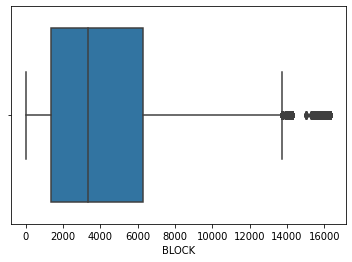

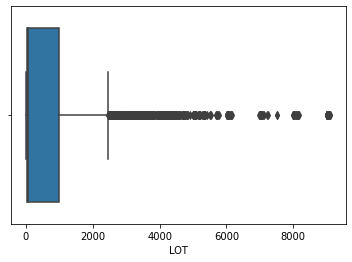

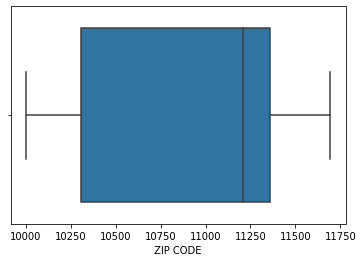

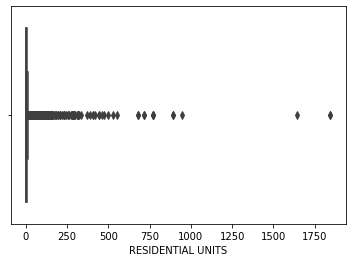

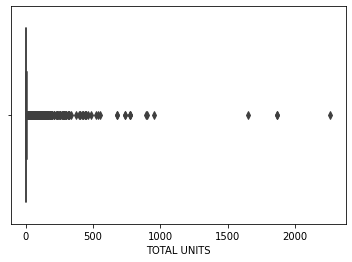

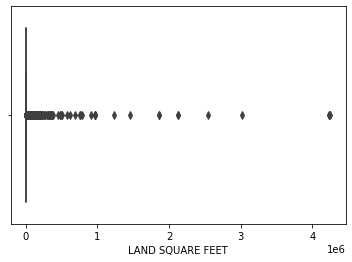

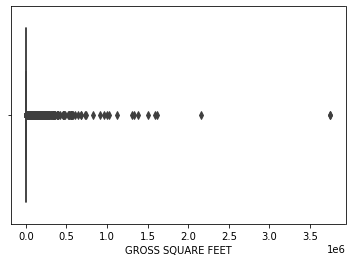

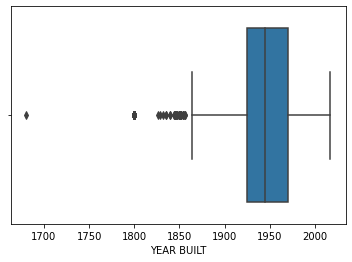

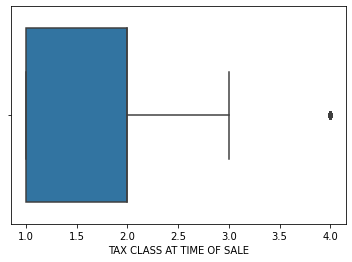

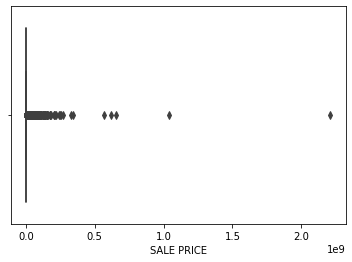

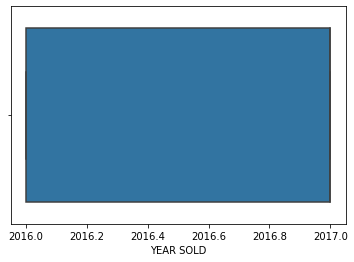

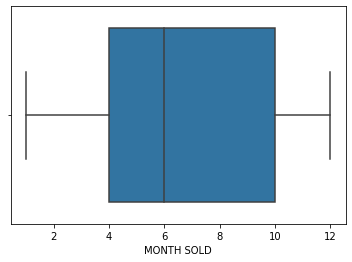

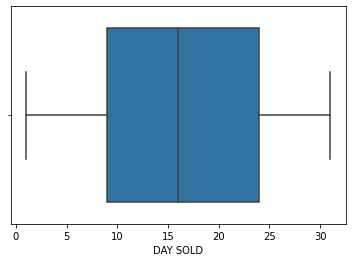

In [23]:
num_cols = all_d.select_dtypes('number')
for i in num_cols.columns:
    sns.boxplot(x=all_d[i],data=all_d)
    plt.show() 

In [24]:
# calculate interquartile range 

# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q1 = num_cols.drop(['SALE PRICE'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q3 = num_cols.drop(['SALE PRICE'], axis=1).quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1

# print the IQR values for numeric variables
print(IQR)

BLOCK                        4958.250000
LOT                           979.000000
ZIP CODE                     1051.000000
RESIDENTIAL UNITS               4.000000
TOTAL UNITS                     4.000000
LAND SQUARE FEET             1375.767566
GROSS SQUARE FEET            2063.671133
YEAR BUILT                     45.000000
TAX CLASS AT TIME OF SALE       1.000000
YEAR SOLD                       1.000000
MONTH SOLD                      6.000000
DAY SOLD                       15.000000
dtype: float64


In [25]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# |: bitwise operator OR in python
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (use "0" for 'index')
all_d = all_d[~((all_d < (Q1 - 1.5 * IQR)) | (all_d > (Q3 + 1.5 * IQR))).any(axis=1)]

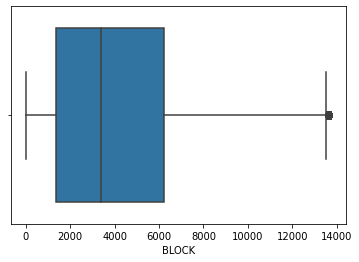

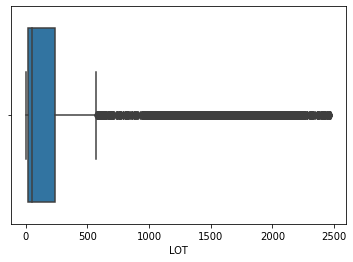

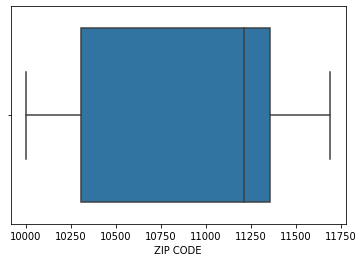

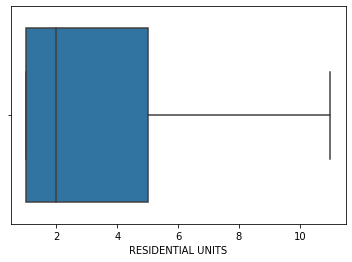

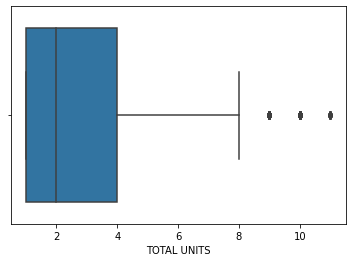

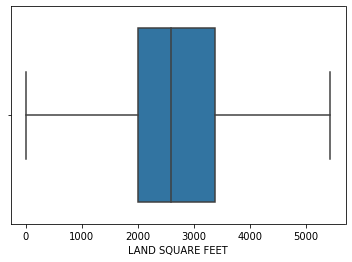

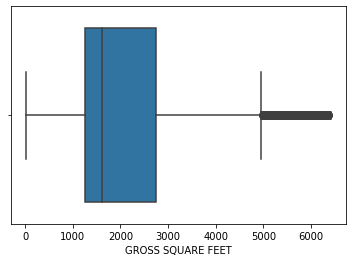

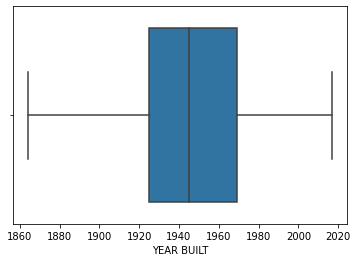

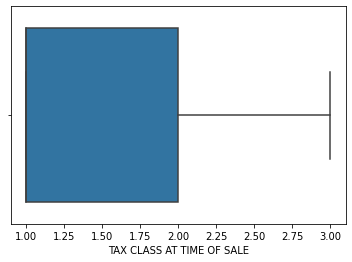

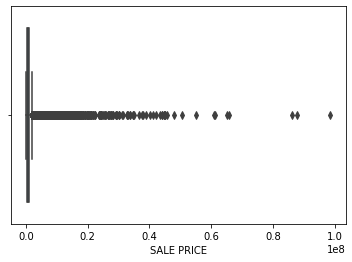

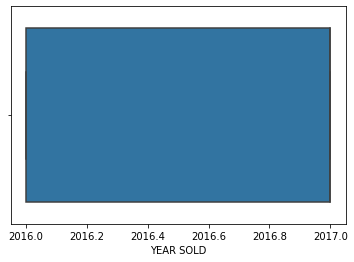

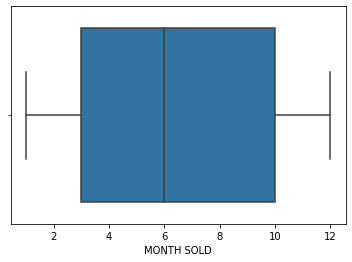

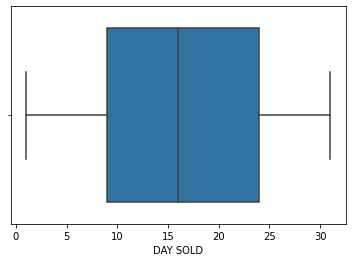

In [26]:
num_cols = all_d.select_dtypes('number')
for i in num_cols.columns:
    sns.boxplot(x=all_d[i],data=all_d)
    plt.show() 

In [27]:
cat_cols=all_d.select_dtypes(['object']).columns
cat_cols

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS AT TIME OF SALE', 'data'], dtype='object')

In [28]:
cat_cols=cat_cols[:-1]
cat_cols

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS AT TIME OF SALE'], dtype='object')

In [29]:
all_d['BOROUGH'].value_counts()

Queens           22115
Brooklyn         20886
Manhattan        14569
Staten Island     6725
Bronx             5723
Name: BOROUGH, dtype: int64

In [30]:
all_d['NEIGHBORHOOD'].value_counts()

Queens_Neighborhood           22169
Brooklyn_Neighborhood         20886
Manhattan_Neighborhood        14569
Staten Island_Neighborhood     6671
Bronx_Neighborhood             5723
Name: NEIGHBORHOOD, dtype: int64

In [31]:
all_d['BUILDING CLASS AT TIME OF SALE'].value_counts()

D4    12569
R4    11937
A1     5687
A5     5625
B1     4576
B2     4330
C0     4230
B3     3506
C6     2705
A2     2188
B9     1488
A9     1359
R3     1351
R1     1246
C3     1055
R2      917
V0      910
S2      777
C2      764
A0      382
S1      336
D0      217
A4      213
R6      203
S9      181
S3      174
C1      164
G0      148
S4      129
A3      129
C5      115
S5       98
A6       74
R8       56
C4       45
R9       32
C7       24
S0       19
Z0       13
RR       11
A7        9
C8        7
V3        6
V2        3
U1        2
D1        2
C9        2
D6        2
R7        1
D5        1
Name: BUILDING CLASS AT TIME OF SALE, dtype: int64

In [32]:
for col in cat_cols:
    freqs=all_d[col].value_counts()
    k=freqs.index[freqs>5000][:-1]
    for cat in k:
        name=col+'_'+cat
        all_d[name]=(all_d[col]==cat).astype(int)
    del all_d[col]
    print(col)

BOROUGH
NEIGHBORHOOD
BUILDING CLASS AT TIME OF SALE


In [33]:
all_d.shape

(70018, 25)

In [34]:
all_d.dtypes

BLOCK                                        int64
LOT                                          int64
ZIP CODE                                     int64
RESIDENTIAL UNITS                            int64
TOTAL UNITS                                  int64
LAND SQUARE FEET                           float64
GROSS SQUARE FEET                          float64
YEAR BUILT                                   int64
TAX CLASS AT TIME OF SALE                    int64
SALE PRICE                                 float64
data                                        object
YEAR SOLD                                    int64
MONTH SOLD                                   int64
DAY SOLD                                     int64
BOROUGH_Queens                               int64
BOROUGH_Brooklyn                             int64
BOROUGH_Manhattan                            int64
BOROUGH_Staten Island                        int64
NEIGHBORHOOD_Queens_Neighborhood             int64
NEIGHBORHOOD_Brooklyn_Neighborh

In [36]:
all_d.isnull().sum()

BLOCK                                          0
LOT                                            0
ZIP CODE                                       0
RESIDENTIAL UNITS                              0
TOTAL UNITS                                    0
LAND SQUARE FEET                               0
GROSS SQUARE FEET                              0
YEAR BUILT                                     0
TAX CLASS AT TIME OF SALE                      0
SALE PRICE                                 10605
data                                           0
YEAR SOLD                                      0
MONTH SOLD                                     0
DAY SOLD                                       0
BOROUGH_Queens                                 0
BOROUGH_Brooklyn                               0
BOROUGH_Manhattan                              0
BOROUGH_Staten Island                          0
NEIGHBORHOOD_Queens_Neighborhood               0
NEIGHBORHOOD_Brooklyn_Neighborhood             0
NEIGHBORHOOD_Manhatt

In [40]:
for col in all_d.columns:
    if (col not in ['SALE PRICE','data'])& (all_d[col].isnull().sum()>0):
        all_d.loc[all_d[col].isnull(),col]=all_d.loc[all_d['data']=='train',col].mean()

In [41]:
all_d.isnull().sum()

BLOCK                                          0
LOT                                            0
ZIP CODE                                       0
RESIDENTIAL UNITS                              0
TOTAL UNITS                                    0
LAND SQUARE FEET                               0
GROSS SQUARE FEET                              0
YEAR BUILT                                     0
TAX CLASS AT TIME OF SALE                      0
SALE PRICE                                 10605
data                                           0
YEAR SOLD                                      0
MONTH SOLD                                     0
DAY SOLD                                       0
BOROUGH_Queens                                 0
BOROUGH_Brooklyn                               0
BOROUGH_Manhattan                              0
BOROUGH_Staten Island                          0
NEIGHBORHOOD_Queens_Neighborhood               0
NEIGHBORHOOD_Brooklyn_Neighborhood             0
NEIGHBORHOOD_Manhatt

In [42]:
for i in all_d.select_dtypes('number').columns:
    print(i, all_d[i].skew())

BLOCK 0.8236092467489958
LOT 1.5266018616915926
ZIP CODE -0.53501262676705
RESIDENTIAL UNITS 0.8453250785226867
TOTAL UNITS 0.9226328802465646
LAND SQUARE FEET 0.3907068605117445
GROSS SQUARE FEET 0.9655341399750452
YEAR BUILT 0.5126594226412708
TAX CLASS AT TIME OF SALE 0.1468739265309015
SALE PRICE 15.479634098189747
YEAR SOLD -0.6512898457826289
MONTH SOLD 0.014197454143418024
DAY SOLD -0.04795286644110719
BOROUGH_Queens 0.7923227708318208
BOROUGH_Brooklyn 0.88177219574798
BOROUGH_Manhattan 1.4383297402769029
BOROUGH_Staten Island 2.741928611804798
NEIGHBORHOOD_Queens_Neighborhood 0.7884875473138955
NEIGHBORHOOD_Brooklyn_Neighborhood 0.88177219574798
NEIGHBORHOOD_Manhattan_Neighborhood 1.4383297402769029
NEIGHBORHOOD_Staten Island_Neighborhood 2.7570840080977073
BUILDING CLASS AT TIME OF SALE_D4 1.6702079728427628
BUILDING CLASS AT TIME OF SALE_R4 1.752507572743141
BUILDING CLASS AT TIME OF SALE_A1 3.066063349761422


In [43]:
all_d_train=all_d[all_d['data']=='train']
del all_d_train['data']
all_d_test=all_d[all_d['data']=='test']
all_d_test.drop(['SALE PRICE','data'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
del all_d

In [45]:
X = all_d_train.drop('SALE PRICE', axis=1)
y= all_d_train['SALE PRICE']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Putting 100 for the n_estimators argument. n_estimators means the number of trees in the forest.

In [49]:
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [50]:
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
y_train_pred = rfr.predict(X_train)



print('Train r2-score : ', r2_score(y_train, y_train_pred))
print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))


y_test_pred = rfr.predict(X_test)



print('Test r2-score : ', r2_score(y_test, y_test_pred))
print('Test RMSE : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train r2-score :  0.9302704785858248
Train RMSE :  533324.8668553878
Test r2-score :  0.5167473036434956
Test RMSE :  1416219.1474886187


In [ ]:
# Predicting target

In [52]:
test_pred=rfr.predict(all_d_test)
test_pred

array([699202.38, 444646.63, 414275.13, ..., 542658.89, 520452.31,
       463998.08])

In [53]:
pd.DataFrame(test_pred).head()

,0
0,699202.38
1,444646.63
2,414275.13
3,482104.18
4,482104.18


In [ ]:
# Random Search cv

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
from scipy.stats import randint as sp_randint

rfr = RandomForestRegressor(random_state=10)

param_dist = {'n_estimators':sp_randint(25, 250),
              'max_features':sp_randint(1, 24),
             'max_depth':sp_randint(2, 15),
             'min_samples_leaf':sp_randint(1, 50)}


rsearch = RandomizedSearchCV(rfr, param_distributions=param_dist, scoring='r2',
                  n_iter=500, cv=3, n_jobs=-1, random_state=4)  #njobs=-1 means it will parallize this job to all core on pc


rsearch.fit(X,y)
rsearch.best_params_

{'max_depth': 11,
 'max_features': 3,
 'min_samples_leaf': 27,
 'n_estimators': 152}

In [62]:
r_best_params = {'max_depth': 11,
 'max_features': 3,
 'min_samples_leaf': 27,
 'n_estimators': 152}

In [64]:
rfr = RandomForestRegressor(**r_best_params, random_state=10) 

rfr.fit(X_train,y_train)

y_train_pred = rfr.predict(X_train)



print('Train r2-score : ', r2_score(y_train, y_train_pred))
print('Train RMSE : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))


y_test_pred = rfr.predict(X_test)

print('Test r2-score : ', r2_score(y_test, y_test_pred))
print('Test RMSE : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train r2-score :  0.3367811427175754
Train RMSE :  1644795.557774426
Test r2-score :  0.31584285057697525
Test RMSE :  1685082.831146648


In [65]:
test_pred=rfr.predict(all_d_test)
test_pred

array([1159350.15142177, 1012337.44074271, 1125808.57903761, ...,
        501402.85187325,  483585.48805604,  508798.64746143])

In [66]:
pd.DataFrame(test_pred).head()

,0
0,1.159350e+06
1,1.012337e+06
2,1.125809e+06
3,1.025649e+06
4,1.025649e+06


In [ ]:
# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfr = RandomForestRegressor(n_estimators=10, random_state=0)

params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
              'min_samples_leaf' : [5,10,20,40,80,100,120,140],
              'min_samples_split':[2,4,8,12,16,20,24,28],
             'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

gridsearch = GridSearchCV(estimator=rfr, param_grid=params, cv=3, scoring='r2', n_jobs=-1)

gridsearch.fit(X,y)

gsearch.best_params_

KeyboardInterrupt: ignored

In [ ]:
g_best_params = 

In [ ]:
rfr = RandomForestRegressor(**g_best_params, random_state=0)

rfr.fit(X_train,y_train)